In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

## 1. 데이터 생성

In [2]:
np.random.seed(42)

def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# add noise
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

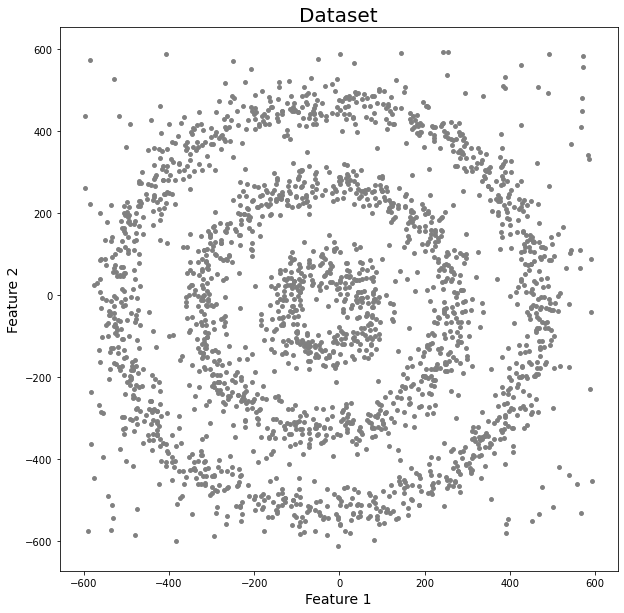

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## 2. K-Means vs Hierarchical vs DBSCAN 비교

### (1) K-Means Clustering

In [4]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

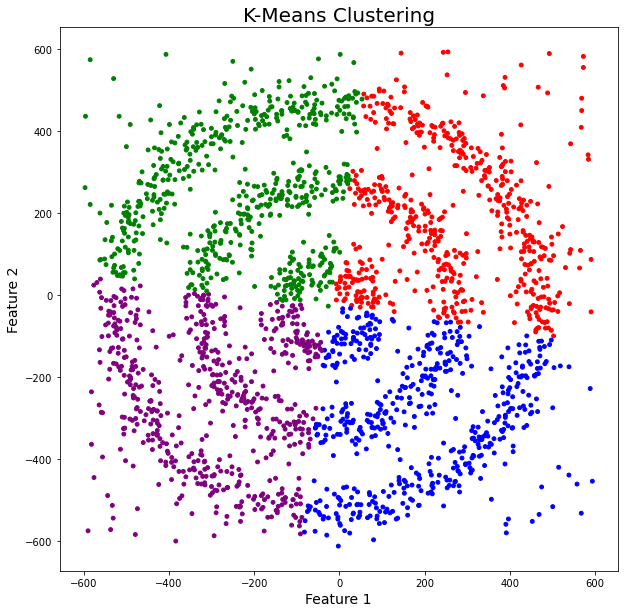

In [5]:
df['KMeans_labels']=k_means.labels_

colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

- 제대로 클러스터링하지 못함.
- noise 분류하지 못함

### (2) Agglomerative Hierarchical Clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

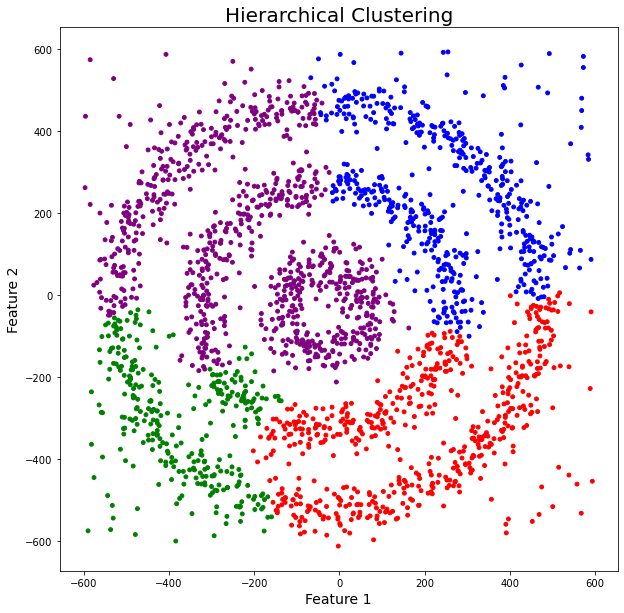

In [7]:
df['HR_labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

- 역시 제대로 클러스터링 하지 못함.

### (3) DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN() # eps = 0.5 / min_samples = 5
dbscan.fit(df[[0,1]])

DBSCAN()

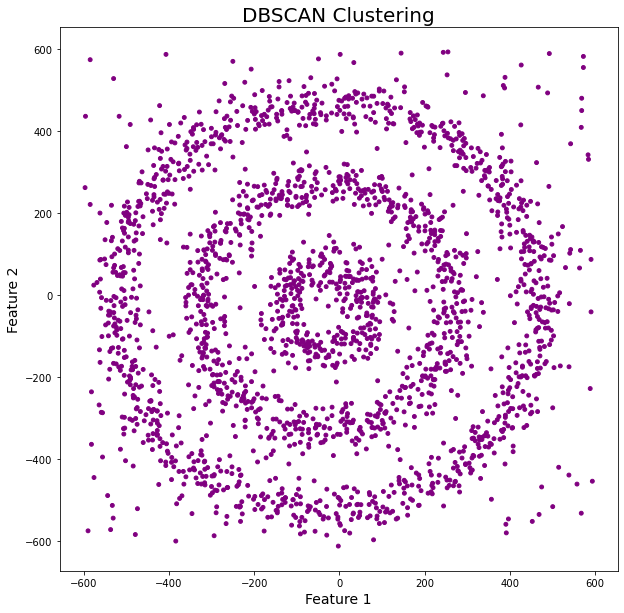

In [9]:
df['DBSCAN_labels']=dbscan.labels_ 

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

- eps가 작아서 클러스터링이 잘 안 된 듯함.
- hyperparameter tuning 해보자.

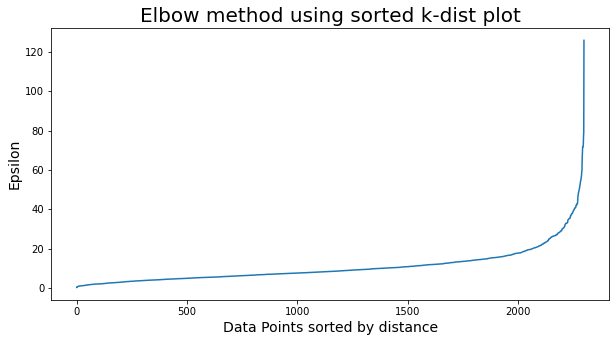

In [10]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(df[[0,1]])
distances, indices = neighbors.kneighbors(df[[0,1]])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

- eps의 최적 값은  그래프에서 최대 곡률 지점 => eps = 30 정도
- min_samples는 도메인 지식에 따라 달라짐 => 여기서는 6으로 설정

In [11]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [12]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

- 0, 1, 2는 세 개의 다른 클러스터이고 -1은 노이즈

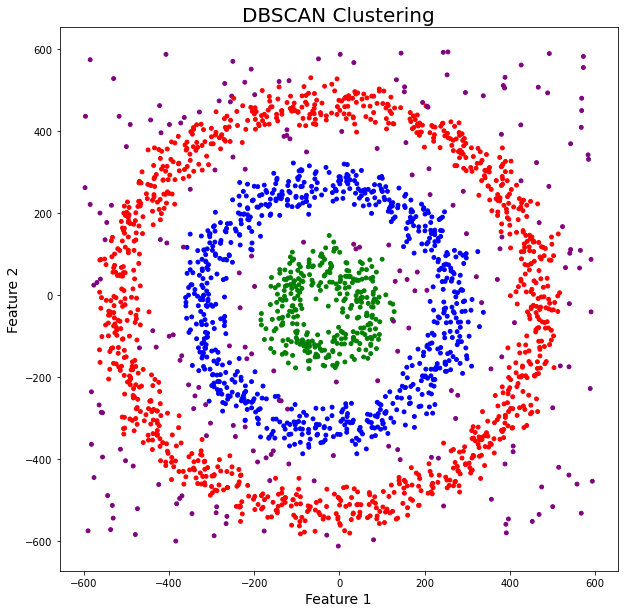

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

- 3개의 클러스터로 클러스터링했으며 노이즈도 감지했다. 

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/